# NEAREST NEIGHBORS

#### LOAD THE DEPENDANCIES

In [201]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import set_printoptions

import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from scipy import stats
import seaborn as sns
import math



In [202]:
#### KNN Classifier

def KNN(k,X_train,y_train,X_test,y_test):
    
    f1_scores=[]
    accur=[]
    preci=[]
    recall=[]
    for i in k:
        
        # Define KNN Model
        classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto',
                                           leaf_size=30, p=2, metric='euclidean',metric_params=None)
        # Fit Model
        classifier.fit(X_train,y_train)

        y_pred = classifier.predict(X_test)
        
        f1,a,p,r=metrics(y_test, y_pred)
        
        f1_scores.append(f1)
        accur.append(a)
        preci.append(p)
        recall.append(r)
        
    print('\n','f1_scores: ',f1_scores)
    print('accuracy: ',accur)
    
    return f1_scores,accur,preci,recall
        
        

In [203]:
#### Evaluate Model

def metrics(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    print('Confusion matrix breakdown:',('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp),'\n')
    print('Confusion matrix:\n', matrix)
    print('Precision: When it predicts yes, how often is it correct?:',precision)
    print('Recall.True Positive Rate: When it\'s actually yes, how often does it predict yes?:',recall)
    print('F1:score is the harmonic average of the precision and recall,:',f1)
    print('Accuracy.Overall, how often is the classifier correct?: ',accuracy)
    print('Misclassification Rate.Overall, how often is it wrong?: ',(1-accuracy))

    return (f1,accuracy,precision,recall)
    


#### RETRIEVE THE DATASET

In [204]:
location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
# location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
dataset=pd.read_csv(location)

In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [206]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### PREPROCESSING: Replacing zeros where it is not a valid value for that feature.
##### This done here by replacing the zero values with a NAN, then replacing the NAN with the average value for non-zero values in that column

In [207]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for header in zero_not_accepted:
    dataset[header]=dataset[header].replace(0,np.nan)
    mean=int(dataset[header].mean(skipna=True))
    dataset[header]=dataset[header].replace(np.nan,mean)


In [208]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### PREPROCESSING: Split the dataset

In [209]:
# X=dataset.iloc[:,0,8]
X=dataset.iloc[:,[1,2,4,5,6,7]]
y=dataset.iloc[:,8]
X.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,155.0,33.6,0.627,50
1,85.0,66.0,155.0,26.6,0.351,31
2,183.0,64.0,155.0,23.3,0.672,32
3,89.0,66.0,94.0,28.1,0.167,21
4,137.0,40.0,168.0,43.1,2.288,33


#### PREPROCESSING: Quick look at the features

['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


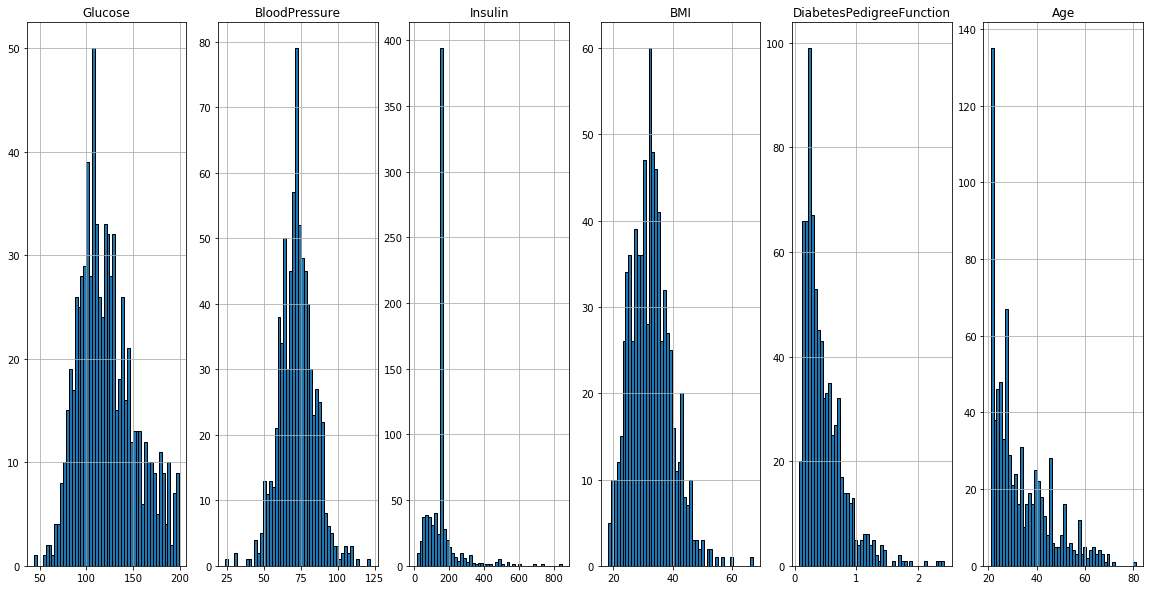

In [210]:
# X.hist(bins=50,figsize=(15,15))
# X.plot(kind='hist',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))

headers=X.columns.tolist()
fig, axes = plt.subplots(nrows=1, ncols=len(headers), figsize=(20, 10))
print(headers)
for i,head in enumerate(headers,0):
    
    axes[i].hist(x=X[head],bins=50,edgecolor='black')
    axes[i].set(title=head)
    axes[i].grid()

plt.show()

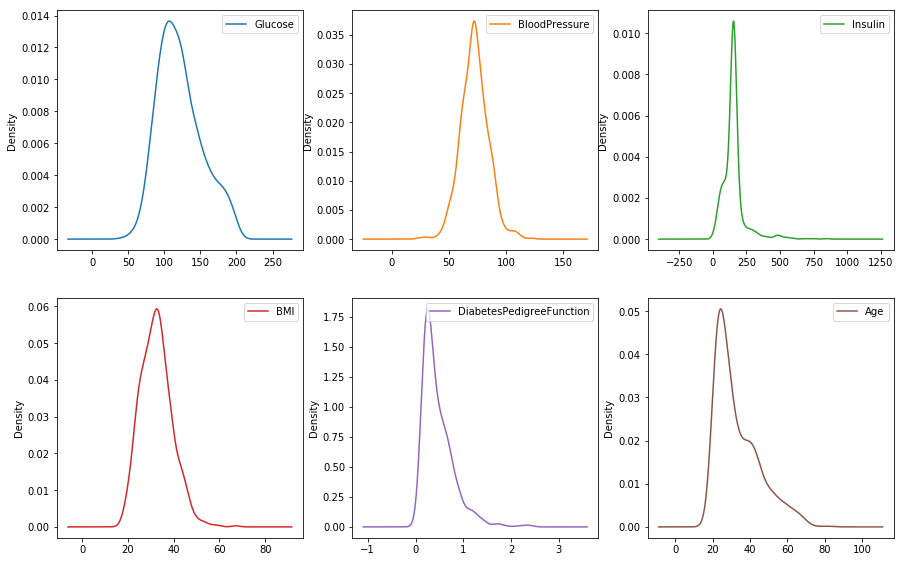

In [211]:
X.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))
plt.show()

#### PREPROCESSING:Target Summary

In [212]:
print(dataset.groupby('Outcome').size())
print((dataset.groupby('Outcome').size()/len(y)*100))


Outcome
0    500
1    268
dtype: int64
Outcome
0    65.104167
1    34.895833
dtype: float64


#### PREPROCESSING:Train - Test Split of the data

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33,train_size=None,random_state=42,shuffle=True,)

In [214]:
X_train.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
464,115.0,98.0,155.0,24.0,1.022,34
223,142.0,60.0,190.0,28.8,0.687,61
393,116.0,72.0,87.0,22.1,0.463,37
766,126.0,60.0,155.0,30.1,0.349,47
570,78.0,70.0,155.0,32.5,0.270,39


#### PREPROCESSING: Feature Scaling

In [215]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X=X_train,y=None)
X_test=sc_X.fit_transform(X=X_test,y=None)

print(sc_X.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


#### Choose a value of k by taking the sqrt of the number of data points

In [216]:
y_test.size

254

In [217]:
k_suggest=round(math.sqrt(y_test.size))
k=[3,5,7,9,11,13,15,17,19,21]
k_suggest

16

In [218]:
f1,accur,precision,recall=KNN(k,X_train,y_train,X_test,y_test)

Confusion matrix breakdown: ('tn:', 128, 'fp:', 40, 'fn:', 34, 'tp:', 52) 

Confusion matrix:
 [[128  40]
 [ 34  52]]
Precision: When it predicts yes, how often is it correct?: 0.5652173913043478
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: 0.6046511627906976
F1:score is the harmonic average of the precision and recall,: 0.5842696629213482
Accuracy.Overall, how often is the classifier correct?:  0.7086614173228346
Misclassification Rate.Overall, how often is it wrong?:  0.2913385826771654
Confusion matrix breakdown: ('tn:', 129, 'fp:', 39, 'fn:', 33, 'tp:', 53) 

Confusion matrix:
 [[129  39]
 [ 33  53]]
Precision: When it predicts yes, how often is it correct?: 0.5760869565217391
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: 0.6162790697674418
F1:score is the harmonic average of the precision and recall,: 0.5955056179775282
Accuracy.Overall, how often is the classifier correct?:  0.7165354330708661
Misclassific

In [219]:
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
# axes[0].plot(k,f1,marker='o')
# axes[1].plot(k,accur,marker='o')
# axes[0].set(title='F1 Score')
# axes[1].set(title='Accuracy')
# axes[0].grid()
# axes[1].grid()

# axes[2].plot(k,precision,marker='o')
# axes[3].plot(k,recall,marker='o')
# axes[2].set(title='Precision')
# axes[3].set(title='Recall')
# axes[2].grid()
# axes[3].grid()

# plt.show()


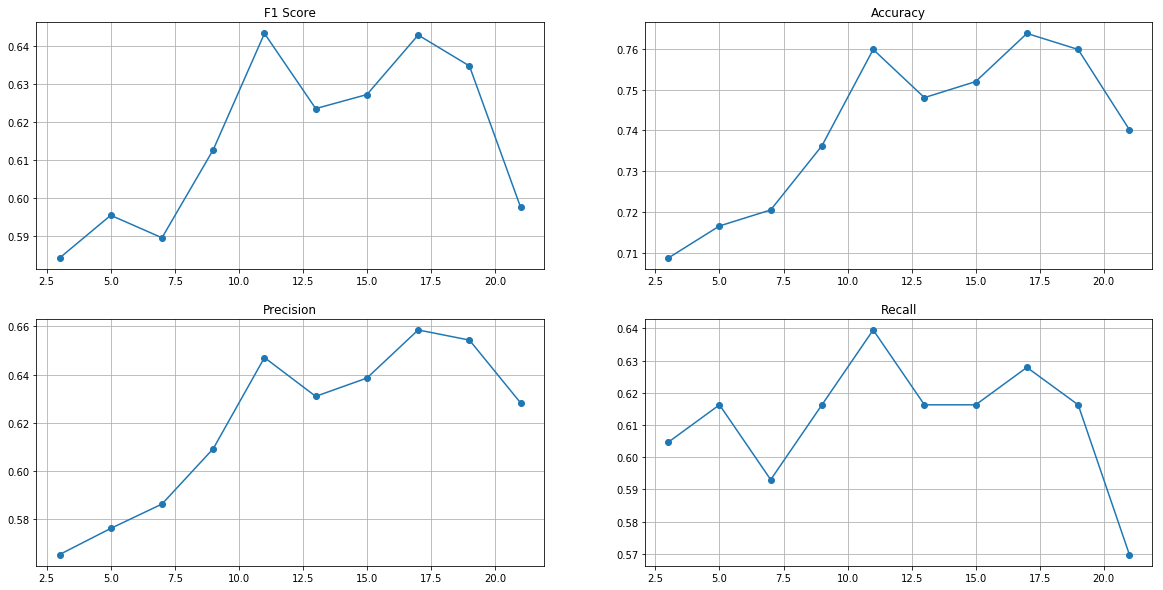

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0,0].plot(k,f1,marker='o')
axes[0,1].plot(k,accur,marker='o')
axes[0,0].set(title='F1 Score')
axes[0,1].set(title='Accuracy')
axes[0,0].grid()
axes[0,1].grid()

axes[1,0].plot(k,precision,marker='o')
axes[1,1].plot(k,recall,marker='o')
axes[1,0].set(title='Precision')
axes[1,1].set(title='Recall')
axes[1,0].grid()
axes[1,1].grid()

plt.show()